In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('insurance.csv')

top 5 rows

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


bottom 5 rows

In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
print('Number of rows' , data.shape[0])
print('Number of columns' , data.shape[1])

Number of rows 1338
Number of columns 7


In [ ]:
#null values
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
data.describe(include = "all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
#convert columns from string [smoke, sex, region] to numerical values

In [ ]:
data['sex'] = data['sex'].map({'male':0, 'female':1})
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})
data['region'] = data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


STORE FEATURE MATRIX IN X AND TARGET IN Y

In [ ]:
X = data.drop(['charges'] , axis = 1)
Y = data['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       2
2      28    0  33.000         3       0       2
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       4
1335   18    1  36.850         0       0       2
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


split the data into two parts
train the data using the training data set
and test the data using the test data set

In [ ]:
from sklearn.model_selection import train_test_split

pass the independent variable, dependent variable, test size and random state

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
#if we do not use a fixed random state then our values(train data and test data) get changed everytime. so we use a fixed random state it can be any number

In [ ]:
X_train

,age,sex,bmi,children,smoker,region
560,46,1,19.950,2,0,3
1285,47,1,24.320,0,0,4
1142,52,1,24.860,0,0,2
969,39,1,34.320,5,0,2
486,54,1,21.470,3,0,3
...,...,...,...,...,...,...
1095,18,1,31.350,4,0,4
1130,39,1,23.870,5,0,2
1294,58,0,25.175,0,0,4
860,37,1,47.600,2,1,1


IMPORT THE MODELS

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR #SUPPORT VECTOR REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



MODEL TRAINING

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
svm = SVR()
svm.fit(X_train, Y_train)
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train, Y_train)

GradientBoostingRegressor()

PREDICTION ON TEST DATA

In [ ]:
Y_predict1 = lr.predict(X_test)
Y_predict2 = svm.predict(X_test)
Y_predict3 = rf.predict(X_test)
Y_predict4 = gr.predict(X_test)

In [ ]:
df1 = pd.DataFrame({'Actual':Y_test, 'LR Predicted':Y_predict1 , 'SVM Predicted' :Y_predict2 , 'RF Predicted':Y_predict3 , 'GR Predicted':Y_predict4 })
print(df1)

           Actual  LR Predicted  SVM Predicted  RF Predicted  GR Predicted
764    9095.06825   8924.407244    9548.268369  10424.005778  11001.128629
887    5272.17580   7116.295018    9492.536262   5239.690266   5840.174656
890   29330.98315  36909.013521    9648.745707  28177.880158  28001.980112
1293   9301.89355   9507.874691    9555.049189  10268.122760   9745.291602
259   33750.29180  27013.350008    9420.451630  34624.820755  33639.100981
...           ...           ...            ...           ...           ...
109   47055.53210  39116.968669    9648.889239  47254.509785  45431.423211
575   12222.89830  11814.555568    9625.420724  12475.836471  12465.025294
535    6067.12675   7638.107736    9504.186517   6356.454815   6974.336525
543   63770.42801  40959.081722    9605.000400  46642.251683  47862.047791
846    9872.70100  12258.228529    9590.983335   9767.222909  10289.655388

[268 rows x 5 columns]


DATA PLOTTING

In [ ]:
import matplotlib.pyplot as plt


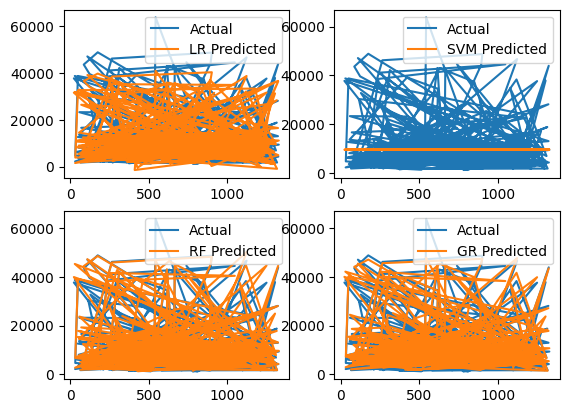

In [ ]:
plt.subplot(221)
plt.plot(df1['Actual'], label ='Actual')
plt.plot(df1['LR Predicted'], label = "LR Predicted")
plt.legend()


plt.subplot(222)
plt.plot(df1['Actual'], label = 'Actual')
plt.plot(df1['SVM Predicted'] , label = "SVM Predicted")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'], label = "Actual")
plt.plot(df1['RF Predicted'] , label = "RF Predicted")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'], label ="Actual")
plt.plot(df1['GR Predicted'] , label = "GR Predicted")
plt.legend()

MODEL 3 AND MOIDEL 4 APPPEARS TO BE PRETTY CLOSE WITH EACH OTHER

MODEL 1 IS NOT MATCHING WITH THE ACTUAL VALUES

AND MODEL 2 IS BASICALLY GIVING A CONSTANT LINE

ALSO MODEL 4 IS THE BEST AMONG ALL THE MODELS

EVALUATING THE ALGORITHM R SQUARED VALUE. GREATER THE R2 VALUE, BETTER IS THE MODEL

In [ ]:
from sklearn import metrics

In [ ]:
score1 = metrics.r2_score(Y_test, Y_predict1)
score2 = metrics.r2_score(Y_test, Y_predict2)
score3 = metrics.r2_score(Y_test, Y_predict3)
score4 = metrics.r2_score(Y_test, Y_predict4)

print(score1, score2, score3, score4)



0.7833463107364539 -0.07229793131123086 0.8651758921762298 0.8779936181637191


therefore model 4 is better

In [ ]:
mae1 = metrics.mean_absolute_error(Y_test, Y_predict1)
mae2 = metrics.mean_absolute_error(Y_test, Y_predict2)
mae3 = metrics.mean_absolute_error(Y_test, Y_predict3)
mae4 = metrics.mean_absolute_error(Y_test, Y_predict4)

print(mae1, mae2, mae3, mae4)

4186.508898366433 8592.439160260994 2442.293922272731 2447.167158715136


here model 3 is better

In [ ]:
PREDICT COST FOR A NEW CUSTOMER

In [ ]:
data = {'age': 20,
        'sex': 1,
        'bmi': 15,
        'children': 1,
        'smoker': 0,
        'region': 1}

df = pd.DataFrame(data, index=[0])
print(df)

new_predict = gr.predict(df)
print(new_predict)

   age  sex  bmi  children  smoker  region
0   20    1   15         1       0       1
[2419.86154567]


SAVE MODEL USING JOBLIB

In [ ]:
gr.fit(X,Y) #now we trained whole data

GradientBoostingRegressor()

In [ ]:
import joblib

In [ ]:
joblib.dump(gr, 'model_joblib_gr')

['model_joblib_gr']

In [ ]:
model = joblib.load('model_joblib_gr')
model.predict(df)

array([1971.79251262])

GUI

In [ ]:
!pip install easygui

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
import joblib



In [ ]:
!export DISPLAY=:0

In [ ]:
!apt-get install -y xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 7,813 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [ ]:
!apt-get install -y xvfb # Install Xvfb
!pip install easygui # Make sure to install easygui
!Xvfb :99 -screen 0 1024x768x24 > /dev/null 2>&1 & # Start Xvfb
!export DISPLAY=:99

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install easygui
import easygui # Make sure to import easygui
import joblib
import pandas as pd #Import pandas for DataFrame creation

# Load the trained model
model = joblib.load('model_joblib_gr') # Make sure the model file exists

# Function to get user input and predict
def predict_insurance_cost():
    # Simulate input fields (replace with your actual features)
    age = easygui.integerbox("Enter age:")
    sex = easygui.enterbox("Enter M[1]/F[0]:")
    bmi = easygui.integerbox("Enter BMI:")
    children = easygui.integerbox("Enter number of children:")
    smoker = easygui.enterbox("Enter smoker[1] or not[0]:")
    region = easygui.enterbox("Enter region:")


    # Create a DataFrame for prediction (adjust to your model's input)
    input_data = pd.DataFrame({'age': [age], 'sex': [sex], 'bmi': [bmi], 'children':[children], 'smoker':[smoker], 'region':[region]})

    # Make prediction
    prediction = model.predict(input_data)[0]

    # Display prediction
    easygui.msgbox(f"Predicted insurance cost: {prediction}")

# Call the function to start the prediction process
predict_insurance_cost()

TclError: no display name and no $DISPLAY environment variable

TclError: no display name and no $DISPLAY environment variable